# Anwendung und Vergleich von Machine Learning und Deep Learning Algorithmen zur Vorhersage von COVID-19 Kennzahlen

## Einführung
Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

## Explorative Datenanalyse
Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Parsing der Daten

In [3]:
# Read in CSV file
df = pd.read_csv('../data/stripped_data/all_data.csv', sep=',', parse_dates =['datum'], index_col ='datum')

In [4]:
# Verify shape of dataframe
df.shape

(662, 12)

In [5]:
# Show first 5 lines of dataframe
df.head(n=5)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2020-02-24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-26,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-27,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Show last 5 lines of dataframe
df.tail(n=5)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2021-12-12,4378,977.0,14179.0,532.0,445.0,96802.0,5507.0,29259.0,62036.0,279.0,1605.0,23
2021-12-13,12320,4693.0,61321.0,5099.0,-406.0,162533.0,11292.0,54591.0,96650.0,303.0,1758.0,18
2021-12-14,9943,4544.0,70722.0,4344.0,200.0,204909.0,12322.0,70720.0,121867.0,289.0,1683.0,22
2021-12-15,5226,4843.0,69503.0,5349.0,-506.0,208149.0,12679.0,75639.0,119831.0,296.0,1650.0,6
2021-12-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
# Last row is not complete --> drop it
df = df[:-1]

In [8]:
# Check data types of features
df.dtypes

cases                                  int64
vaccination_atLeastOneDosePersons    float64
vaccination_firstBoosterPersons      float64
vaccination_fullyVaccPersons         float64
vaccination_partiallyVaccPersons     float64
certificate_all                      float64
certificate_recovered                float64
certificate_tested                   float64
certificate_vacinated                float64
hosp_total_icu_covid                 float64
hosp_total_covid                     float64
death                                  int64
dtype: object

In [158]:
# The feature "Datum" is of type object. This can be converted to datatime.
df['datum'] = pd.to_datetime(df['datum'], errors='coerce')

In [9]:
df.dtypes

cases                                  int64
vaccination_atLeastOneDosePersons    float64
vaccination_firstBoosterPersons      float64
vaccination_fullyVaccPersons         float64
vaccination_partiallyVaccPersons     float64
certificate_all                      float64
certificate_recovered                float64
certificate_tested                   float64
certificate_vacinated                float64
hosp_total_icu_covid                 float64
hosp_total_covid                     float64
death                                  int64
dtype: object

In [10]:
# All the other features are either of type float64 or int64. As these COVID-19 numbers must be whole-number, we can convert all these features to int64.
numerical_cols = ['cases',
'vaccination_atLeastOneDosePersons',
'vaccination_firstBoosterPersons',
'vaccination_fullyVaccPersons',
'vaccination_partiallyVaccPersons',
'certificate_all',
'certificate_recovered',
'certificate_tested',
'certificate_vacinated',
'hospitalisation',
'hosp_capacity_icu_covid',
'hosp_capacity_total_covid',
'death'
]

# Here, we have a problem to convert the columns from np.float64 to np.int64 as there are lots of NA values in the dataset.
df[numerical_cols] = df[numerical_cols].astype(np.int64)

KeyError: "['hospitalisation', 'hosp_capacity_icu_covid', 'hosp_capacity_total_covid'] not in index"

### Explorative Datenanalyse und Datenbereinigung

#### Duplicates

In [11]:
# There are no duplicates in the dataset. So, we don't have to drop any rows.
df.duplicated().any()

True

In [12]:
# Show duplicates - the data points from 2020-02-24 and 2020-02-25 and the data points from 2020-02-26, 2020-02-27 and 2020-02-28 have the same values. However, this is plausible as it is the beginning of the
# COVID-19 pandemie and the number of cases and death can be the same by chance.
df[df.duplicated(keep=False)].head(n=10)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2020-02-24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-26,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-27,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Null Values

In [13]:
# We see that in most of the columns there are null values.
df.isna().any()

cases                                False
vaccination_atLeastOneDosePersons     True
vaccination_firstBoosterPersons       True
vaccination_fullyVaccPersons          True
vaccination_partiallyVaccPersons      True
certificate_all                       True
certificate_recovered                 True
certificate_tested                    True
certificate_vacinated                 True
hosp_total_icu_covid                  True
hosp_total_covid                      True
death                                False
dtype: bool

In [14]:
df.isnull().sum()

cases                                  0
vaccination_atLeastOneDosePersons    301
vaccination_firstBoosterPersons      301
vaccination_fullyVaccPersons         301
vaccination_partiallyVaccPersons     301
certificate_all                      469
certificate_recovered                469
certificate_tested                   469
certificate_vacinated                469
hosp_total_icu_covid                  36
hosp_total_covid                      36
death                                  0
dtype: int64

Im Buch von Aileen Nielsen [1] werden drei verschiedene Methoden behandelt, um mit fehlenden Daten umzugehen:
1. Löschen der Datenpunkte
Datenpunkte, die fehlende Werte für gewisse Features aufweisen, werden gelöscht und aus dem Datensatz entfernt.
2. Imputation
Einfüllen der fehlenden Werte basierend auf Daten stammmend aus dem gesamten Datenset.
3. Interpolation
Interpolation ist eine Form von Inputation. Dabei werden die fehlenden Daten basierend auf ihren Nachbarn aufgefüllt.

Wenn man das COVID-19 Datenset genauer betrachtet, fällt auf, dass die fehlenden Werte nicht auf einen Messfehler zurückzuführen sind. Der Grund liegt darin, dass nicht alle Messwerte von Anfang an aufgezeichnet wurden. 

##### Features betreffend Impfung (vaccination_atLeastOneDosePersons, vaccination_firstBoosterPersons, vaccination_fullyVaccPersons, vaccination_partiallyVaccPersons)
Die Zahlen betreffend die Impfungen wurden erst ab dem 21.12.2020 erfasst, da sich vorher noch niemand gegen COVID-19 impfen konnte. Daraus resultieren die 302 fehlenden Werte pro Feature.
Es bietet sich an, diese 'NaN' Werte mit '0' zu ersetzen.

In [15]:
# Find all NaN Values for 'vaccination_atLeastOneDosePersons'
indices = list(df.loc[pd.isna(df['vaccination_atLeastOneDosePersons']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [16]:
df['vaccination_atLeastOneDosePersons'] = df['vaccination_atLeastOneDosePersons'].fillna(0)

In [17]:
# Find all NaN Values for 'vaccination_firstBoosterPersons'
indices = list(df.loc[pd.isna(df['vaccination_firstBoosterPersons']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [18]:
df['vaccination_firstBoosterPersons'] = df['vaccination_firstBoosterPersons'].fillna(0)

In [19]:
# Find all NaN Values for 'vaccination_fullyVaccPersons'
indices = list(df.loc[pd.isna(df['vaccination_fullyVaccPersons']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [20]:
df['vaccination_fullyVaccPersons'] = df['vaccination_fullyVaccPersons'].fillna(0)

In [21]:
# Find all NaN Values for 'vaccination_partiallyVaccPersons'
indices = list(df.loc[pd.isna(df['vaccination_partiallyVaccPersons']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [22]:
df['vaccination_partiallyVaccPersons'] = df['vaccination_partiallyVaccPersons'].fillna(0)

In [23]:
df.head(n=5)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2020-02-24,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-25,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-26,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-27,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-02-28,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


##### Features betreffend Zertifikate (certificate_all, certificate_recovered, certificate_tested, certificate_vacinated)
Bei all diesen Features sind offensichtlich 470 fehlende Werte vorhanden. Dies hat ebenfalls den Grund, dass Zertifikate nicht von Beginn der Pandemie an ausgestellt wurden. Also entsprechen die 'NaN' Werte ebenfalls dem Wert '0'.

In [24]:
# Find all NaN Values for 'certificate_all'
indices = list(df.loc[pd.isna(df['certificate_all']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [25]:
df['certificate_all'] = df['certificate_all'].fillna(0)

In [26]:
# Find all NaN Values for 'certificate_recovered'
indices = list(df.loc[pd.isna(df['certificate_recovered']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [27]:
df['certificate_recovered'] = df['certificate_recovered'].fillna(0)

In [28]:
# Find all NaN Values for 'certificate_tested'
indices = list(df.loc[pd.isna(df['certificate_tested']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [29]:
df['certificate_tested'] = df['certificate_tested'].fillna(0)

In [30]:
# Find all NaN Values for 'certificate_vacinated'
indices = list(df.loc[pd.isna(df['certificate_vacinated']), :].index)
print(indices)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [31]:
df['certificate_vacinated'] = df['certificate_vacinated'].fillna(0)

##### Features betreffend Spitalkapazitäten (hosp_capacity_icu_covid und hosp_capacity_total_covid)
Diese beiden Features beinhalten je 36 fehlende Werte.

In [32]:
index = []
index = list(df.loc[pd.isna(df['hosp_total_icu_covid']), :].index)
print(index)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

In [33]:
index = []
index = list(df.loc[pd.isna(df['hosp_total_covid']), :].index)
print(index)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('20

Man kann sehen, dass die ersten 35 Werte fehlen. Lässt man sich jedoch den nächsten Datenpunkt anzeigen, sind folgende Werte vorhanden:
- hosp_capacity_icu_covid: 446 (= Anzahl COVID-19 Patienten auf der Intensivstation)
- hosp_capacity_total_covid: 1308 (= Gesamtanzahl COVID-19 Patienten in den Spitälern)

Es ist anzunehmen, dass die Werte für die obigen Features seit Beginn der Pandemie angestiegen sind. Und nicht auf einmal 446 resp. 1308 COVID-19 Patienten im Spital waren. Aus dieser Überlegung ist es wahrscheinlich, dass die Zahlen für diese beiden Features für die ersten 35 Tage entweder nicht gemessen oder nicht gemeldet wurden.

In [34]:
df.iloc[35, :]

cases                                1307.0
vaccination_atLeastOneDosePersons       0.0
vaccination_firstBoosterPersons         0.0
vaccination_fullyVaccPersons            0.0
vaccination_partiallyVaccPersons        0.0
certificate_all                         0.0
certificate_recovered                   0.0
certificate_tested                      0.0
certificate_vacinated                   0.0
hosp_total_icu_covid                  446.0
hosp_total_covid                     1308.0
death                                  58.0
Name: 2020-03-30 00:00:00, dtype: float64

Zudem fehlen die Werte für den Datenpunkt vom 2021-05-03. Es fällt jedoch auf, dass die Zeile zuvor (2021-05-02) und die Zeile danach (2021-05-04) über Werte für diese beiden Features verfügen. Es ist deshalb davon auszugehen, dass es sich hierbei ebenfalls um nicht gemeldete Werte handelt.

In [35]:
df.iloc[434, :]

cases                                 2019.0
vaccination_atLeastOneDosePersons    51669.0
vaccination_firstBoosterPersons          1.0
vaccination_fullyVaccPersons         10312.0
vaccination_partiallyVaccPersons     41357.0
certificate_all                          0.0
certificate_recovered                    0.0
certificate_tested                       0.0
certificate_vacinated                    0.0
hosp_total_icu_covid                     NaN
hosp_total_covid                         NaN
death                                    5.0
Name: 2021-05-03 00:00:00, dtype: float64

In [36]:
df.iloc[433, :]

cases                                  832.0
vaccination_atLeastOneDosePersons    11848.0
vaccination_firstBoosterPersons          0.0
vaccination_fullyVaccPersons          1006.0
vaccination_partiallyVaccPersons     10842.0
certificate_all                          0.0
certificate_recovered                    0.0
certificate_tested                       0.0
certificate_vacinated                    0.0
hosp_total_icu_covid                   206.0
hosp_total_covid                       886.0
death                                    8.0
Name: 2021-05-02 00:00:00, dtype: float64

In [37]:
df.iloc[435, :]

cases                                 1735.0
vaccination_atLeastOneDosePersons    55433.0
vaccination_firstBoosterPersons          0.0
vaccination_fullyVaccPersons         21642.0
vaccination_partiallyVaccPersons     33791.0
certificate_all                          0.0
certificate_recovered                    0.0
certificate_tested                       0.0
certificate_vacinated                    0.0
hosp_total_icu_covid                   187.0
hosp_total_covid                       858.0
death                                    4.0
Name: 2021-05-04 00:00:00, dtype: float64

In [38]:
# Also on the first five days of the measurement, it is unlikely to have a COVID-19 patient already in hospital. So, we set theses values to '0'
df.loc[0:5, 'hosp_total_icu_covid'] = 0

/Users/jfurrer/opt/anaconda3/envs/Innovation_Project/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [39]:
df.loc[0:5, 'hosp_total_covid'] = 0

In [40]:
df.head(n=10)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2020-02-24,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-26,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-27,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-28,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-29,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
2020-03-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
2020-03-02,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
2020-03-03,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0


In [41]:
# Interpolation
df['hosp_total_icu_covid'] = df['hosp_total_icu_covid'].interpolate(method='linear')
df.head(n=10)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2020-02-24,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2020-02-25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2020-02-26,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2020-02-27,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2020-02-28,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2020-02-29,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.387097,NaN,0
2020-03-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.774194,NaN,0
2020-03-02,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.161290,NaN,0
2020-03-03,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.548387,NaN,0


In [42]:
df['hosp_total_covid']= df['hosp_total_covid'].interpolate(method='linear')
df.head(n=10)

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,,
2020-02-24,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2020-02-25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2020-02-26,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2020-02-27,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2020-02-28,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2020-02-29,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.387097,42.193548,0
2020-03-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.774194,84.387097,0
2020-03-02,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.161290,126.580645,0
2020-03-03,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.548387,168.774194,0


#### Data Ranges

In [43]:
df.describe()

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,1755.098336,8962.937973,2013.114977,8737.226929,225.711044,30055.850227,920.594554,15236.443268,13898.812405,170.262481,823.335855,17.373676
std,2252.538419,14554.615878,9786.431320,14550.094017,9621.088190,56880.423274,2200.382933,31328.311070,36880.962645,145.022728,873.921793,26.429859
min,1.000000,0.000000,0.000000,0.000000,-45037.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,130.000000,1.000000
50%,1020.000000,837.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,581.000000,6.000000
75%,2239.000000,12500.000000,0.000000,13032.000000,649.000000,49194.000000,1101.000000,18834.000000,11799.000000,250.000000,1033.000000,19.000000
max,12688.000000,63860.000000,71106.000000,61971.000000,41357.000000,476930.000000,21140.000000,188844.000000,471262.000000,528.000000,3656.000000,108.000000


Wenn man die statistichen Kennzahlen zu den verschiednen Features betrachtet, fällt auf, dass das Feature 'vaccination_partiallyVaccPersons' z.t. negative Werte aufweist. Dies ist zu untersuchen.
Gemässe der Beschreibung der Features auf https://www.covid19.admin.ch/api/data/documentation/models/sources-definitions-vaccpersonsincomingdata.md, wird das Feature 'vaccination_partiallyVaccPersons' wie folgt beschrieben: \
_Number of persons that are partially vaccinated (difference between COVID19AtLeastOneDosePersons and COVID19FullyVaccPersons)_

Es ist also die Differenz aus der Anzahl Personen, die mindestens eine Impfdosis erhalten haben und der Anzahl Personen, die vollständig geimpft sind. Damit dieser Wert negativ sein kann, muss die Anzahl der Personen mit zwei verabreichten Dosen höher sein als die Anzahl der Personen mit mindestens einer verabreichten Dosis (eine oder beide). Dies macht logisch keinen Sinn.

Aus diesem Grund entscheiden wir uns, dieses Features aus dem Datenset zu löschen.

In [44]:
# Delete feature 'vaccination_partiallyVaccPersons'
df = df.drop('vaccination_partiallyVaccPersons', axis=1)

#### Visualisierung

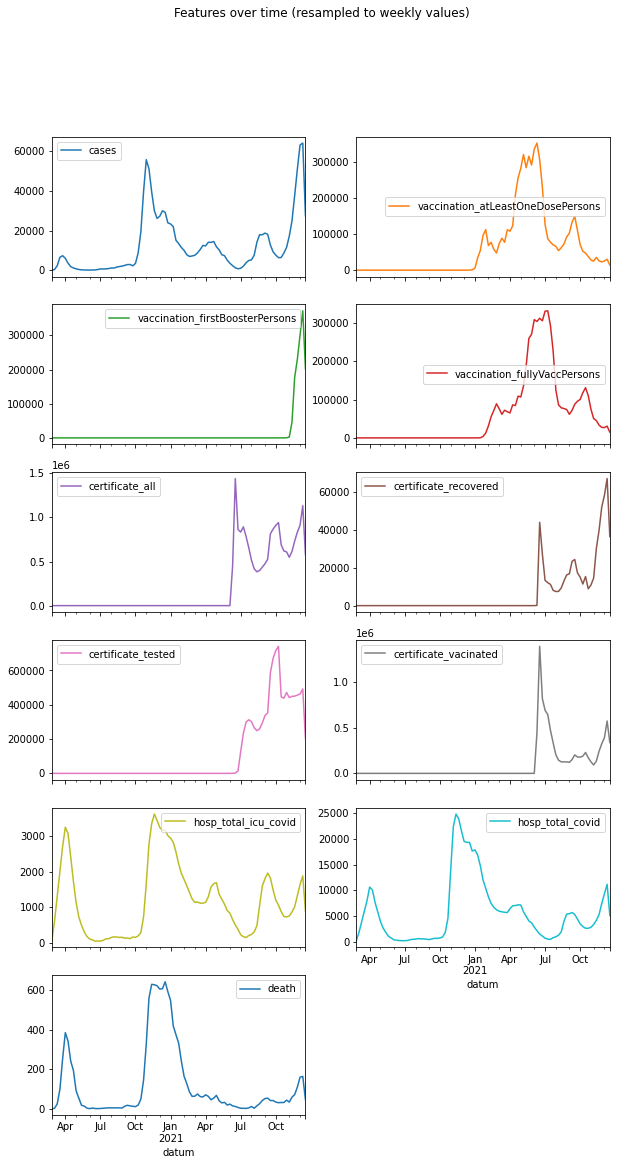

In [46]:
df_resampled = df.resample('W').sum()

_ = df_resampled.plot(title="Features over time (resampled to weekly values)", subplots=True, layout=(6,2), figsize=(10,18))

#### Outliers

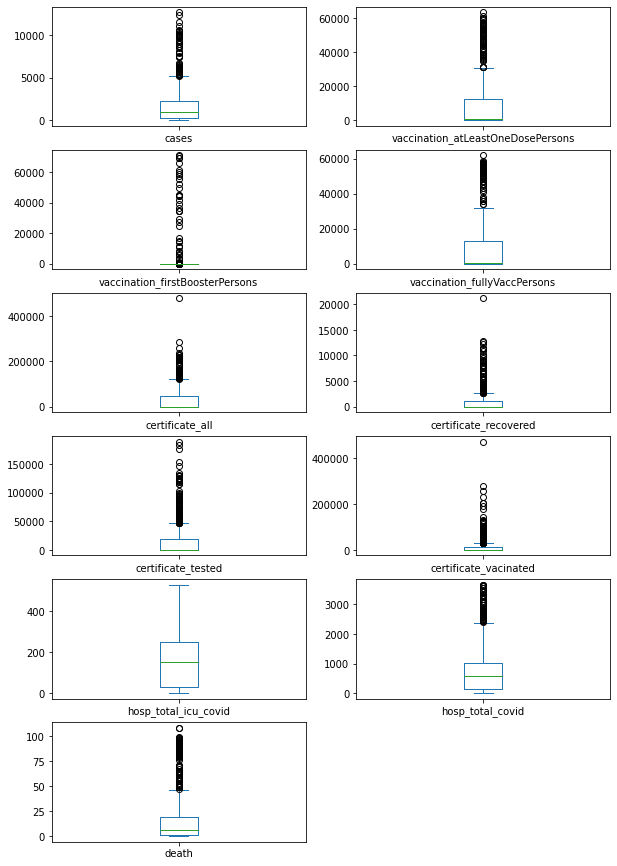

In [47]:
_ = df.plot(kind='box', subplots=True, layout=(7, 2), figsize=(10, 18), sharex=False)

Wie in den Box-Plots zu sehen ist, weisen einige der Features Outliers auf. Für die Features 'certificate_all' und 'death' schauen wir uns diese Ausreisser genauer an.

In [48]:
# Outliers for feature 'certificate_all'. There is one value on 2021-06-18 that is way higher than the others. This significant increase would have to be clarified with the provider of the data. For now, we leave it as is.
df.sort_values('certificate_all', ascending=False).head()

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,
2021-06-18,149,48319.0,0.0,57633.0,476930.0,5233.0,435.0,471262.0,71.0,196.0,3
2021-06-15,233,54322.0,0.0,53275.0,286096.0,6575.0,114.0,279407.0,83.0,256.0,1
2021-06-21,165,46857.0,0.0,45303.0,258680.0,3841.0,341.0,254498.0,68.0,197.0,2
2021-06-16,191,51554.0,0.0,54851.0,235318.0,3883.0,164.0,231271.0,73.0,243.0,4
2021-12-10,9739,5586.0,69086.0,6868.0,228574.0,11454.0,115586.0,101534.0,274.0,1615.0,19


In [49]:
# Outliers for feature 'death'. The highest values (november 2020) occured at the peak of the second COVID wave. So, these values are plausible.
df.sort_values('death', ascending=False).head()

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,
2020-11-18,4855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,524.0,3537.0,108
2020-11-12,5963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,3611.0,108
2020-12-20,1956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425.0,2687.0,99
2020-12-14,5914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,477.0,2886.0,98
2020-11-23,5433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,519.0,3421.0,98


### Correlation Analyse

<AxesSubplot:>

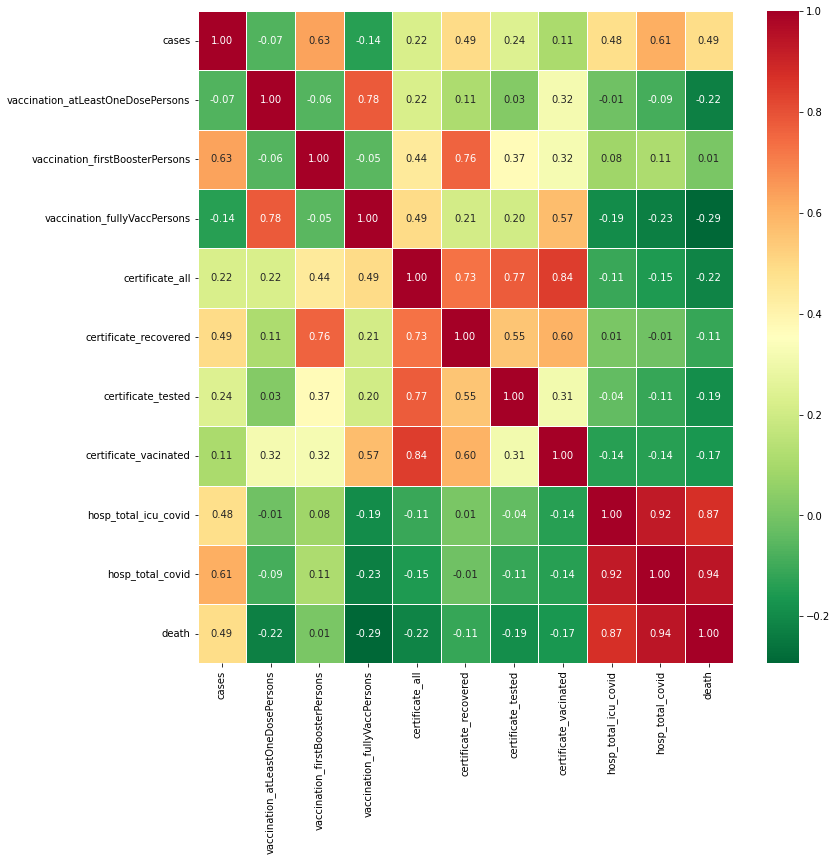

In [50]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r', linewidth=0.5, fmt='.2f')

#### Sanity Check

In [61]:
# TODO: Check logical constraints in the dataset (e.g. is min always less that max)

df.head()

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hosp_total_icu_covid,hosp_total_covid,death
datum,,,,,,,,,,,
2020-02-24,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-26,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-27,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-02-28,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Splitting (in Trainings- und Testdaten)
Bei Time Series kann das Splitting nicht zufällig passieren. Für das Trainingsset wird z.B. die ersten 70% der Daten und für das Testset 30% der Daten verwendet.

In [66]:
# Define number of splits
# num_split = 

# Convert Dataframe to Numpy array
data = df.values

# Calculate number of datapoints
num_datapoints = data.shape[0]
num_training = int(num_datapoints*0.7)
num_test = int(num_datapoints*0.3)

# Split data in features and label
X = data[:, 1:]
y = data[:, 0]

# Verify the shapes of X and y
print(X.shape)
print(y.shape)

# Split X and y in training and test sets
X_train, X_test = X[:num_training], X[num_training:]
y_train, y_test = y[:num_training], y[num_training:]

# Verify the shapes of X_train, X_test, y_train and y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(661, 10)
(661,)
(462, 10)
(199, 10)
(462,)
(199,)


In [68]:
# Save the training and test set on disk for further use
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)